# Homework 5

In this homework, I will use the MNIST image data from scikit learn and perform PCA, t-SNE, k-means clustering, and hierarchal clustering on the data. 

First, I need to read in the data set:

In [1]:
#import data
from sklearn.datasets import fetch_mldata
#import package for PCA in next section
from sklearn.decomposition import PCA

#import data and name it mnist
mnist = fetch_mldata("MNIST original")
#X represents each image's 28 by 28 pixel image data (70000 images each with 784 pixels)
X = mnist.data / 255.0
#y represents the assigned labels for each image, being values 0-9 because the images are handwritten numbers 0-9
y = mnist.target

In [2]:
#import packages needed for using data and visualizing it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
#shows us that there are 70000 images in this data set
len(X)

70000

In [43]:
len(y)

70000

In [44]:
#This is the pixel information for the first image
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## PCA

Here we are going to use PCA for dimensionality reduction. We do this because we have 784 pixels, which are our features in this dataset. Having this many features leaves us prone to the curse of dimensionality, which is that points will be very spaced apart in high dimensions and can cause our models to overfit this data in sample. We need a way to reduce the dimensions without throwing away all the information they provide. We do this through PCA. However, one of the drawbacks of using PCA is that you lose the meaning of each component. If you had a two-dimensional data set (height and weight) and you wanted to use PCA to reduce it to one dimension, you would get some hybrid axis of height and weight. The new PCA dimensions don't have the same meaning as the original dimensions, so it makes interpretation difficult.

I will first compress the data into 2 components using PCA and will plot each component in a scatter plot. Although it is tough to see because of the sheer magnitude of the number of data points, we can see that the first component explains more variation in the data than the second component. This is what PCA does: it finds the axis that explains the most variation in the data, and then the next component finds the axis with that explains the most variation of what is left, and so on until you complete as many components as you tell the PCA command to compute. 

In [28]:
#Make a PCA with two components and fit it to the data
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

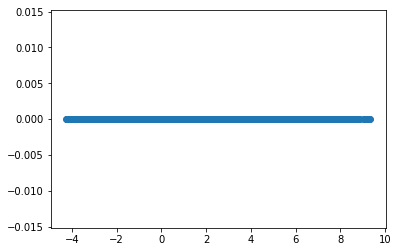

In [39]:
#Take the first component and plot it on horizontal scatter plot
plt.scatter(X_2dim[:,0], np.zeros(len(X_2dim)))

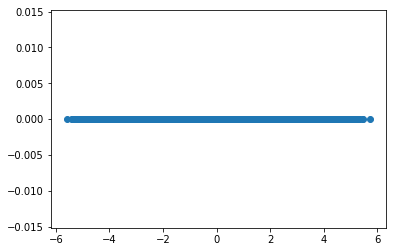

In [41]:
#Take the second component and plot it on horizontal scatter plot
plt.scatter(X_2dim[:,1], np.zeros(len(X_2dim)))

Next, I will try to determine how many components is optimal for dimensionality reduction. I will start off with 10 and see how that does

In [6]:
#set up PCA to run with 10 components
pca = PCA(n_components=10)
#fit the PCA command to the data and call it X_10dim
X_10dim = pca.fit_transform(X)

In [7]:
#look at the shape to see that there are 70000 images with 10 dimensions instead of 784
X_10dim.shape

(70000, 10)

In [8]:
#this shows us the explained variance for each of the 10 components
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278261, 0.02889641, 0.02758364, 0.0234212 ])

In [9]:
#this shows us the total explained variance using 10 components in the pca
sum(pca.explained_variance_ratio_)

0.48917022452169057

After creating 10 components, we see that it explains about 49% of the variance in the data. Is this good enough? Let's run the PCA again but with 784 components (the maximum amount we can use) and see how the explained variance increases with each additional component.

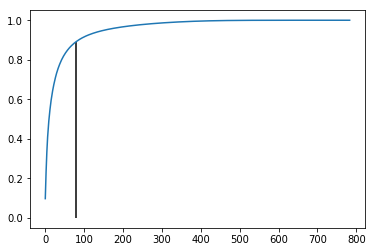

In [10]:
#run pca with as many components as there are dimensions
pca = PCA(n_components=784)
#fit the pca to the data
X_pca = pca.fit_transform(X)
#create an array of a cumulative sum of the explained variance as a component is added
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
#plot the cumulative sum
plt.plot(range(len(cum_ratio)), cum_ratio)
#draw vertical line at elbow of plot
plt.vlines(ymin=0,ymax=cum_ratio[80],x=80)

We can see that at about 80 components, the rate of increased variance accounted for by a marginal component is small. Once you get to 80 components, each additonal componenet doesn't add much to our total explained variance, so I will use 80 components for my PCA.

Below, I show a few images how they were originally rendered and then I used PCA to compress them and then plot them using only the features that are kept. They look very similar, and I think this is because of the point I made earlier that the axes that include the most variance are the ones that are used in PCA, so the images look roughly the same as the ones with all the dimensions because it shows the most important information. It just looks a little fuzzy because it's missing the little detailed information that would have been retained if there were more components. 

**Note: I used 81 in the PCA instead of 80 because you can reshape it to be 9x9 to render the image, while 80 components wouldn't be able to do that. 

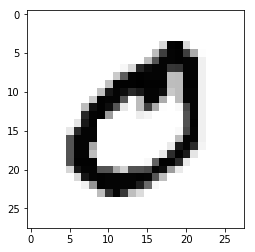

In [11]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

In [60]:
#define PCA with 81 componenets and fit to data
pca = PCA(n_components=81)
X_81dim = pca.fit_transform(X)

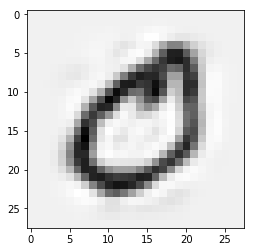

In [61]:
#pca.inverse_transform takes the compressed data and inverses it back so that we can render it into an image
X_inverse = pca.inverse_transform(X_81dim)
plt.imshow(X_inverse[1].reshape((28,28)), cmap='Greys')

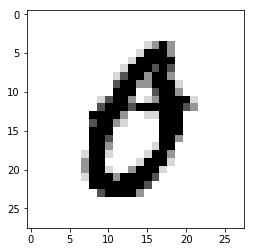

In [21]:
plt.imshow(X[5035].reshape((28,28)), cmap='Greys')

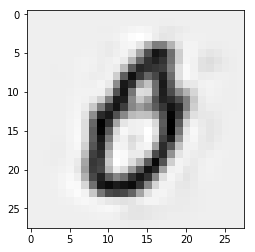

In [62]:
plt.imshow(X_inverse[5035].reshape((28,28)), cmap='Greys')

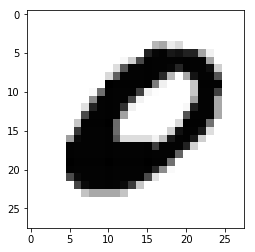

In [23]:
plt.imshow(X[3159].reshape((28,28)), cmap='Greys')

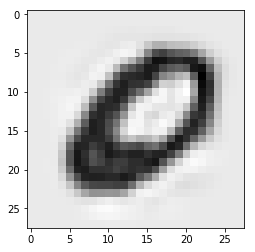

In [63]:
plt.imshow(X_inverse[3159].reshape((28,28)), cmap='Greys')

## t-SNE

Now I want to use t-SNE to visualize the data. After we have reduced the dimensionality, we want to be able to sort the data into its labels (numbers 0-9) and group them together. We want to visually see how well the PCA did at reducing dimensionality but preserving the information. In order to visualize this, we need to take this high-dimensional data into 2 dimensions. Below, run a PCA to compress the data into 80 components like I did above, then use the first two components for the t-SNE visualization with a perplexity of 50, 1000 iterations, and a learning rate of 200. I will toy with these parameters to test the robustness of the t-SNE model.

In [45]:
#import TSNE package from scikit learn
from sklearn.manifold import TSNE

In [46]:
#define pca and fit it to data
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

#shuffle a list of numbers 1-70000 and choose first 1000 for tsne, giving us a random sample
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#define tsne and fit to the defined sample of compressed data 
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.063s...
[t-SNE] Computed neighbors for 10000 samples in 39.624s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.049371
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.961533
[t-SNE] Error after 1000 iterations: 1.705381


In [47]:
#import for visualization
import seaborn as sns

In [48]:
#initialize dataframe that takes the tsne results where each column is a component and each image is a row
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
#create new column that puts the labels from "y" for the selected images so we can sort them
df_tsne['label'] = y[rows[:n_select]]

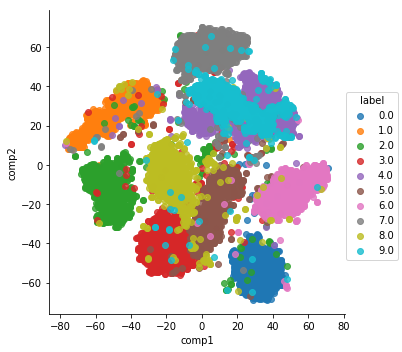

In [49]:
#plot the tsne results
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

This graph did a pretty good job of separating and clustering data points of the same label. We can see that there was some difficulty differentiating the '9' from the '4' which makes sense beacause they can look similar when writing. '8,' '5,' and '3' are all overlapping a little, showing that there are cases where it is hard to differentiate between them in writing. 

This plot differs from the one in PCA because it separates and clusters the data points based on its label where the PCA plot just showed the variation in each component without the differentiation of labels. To test the robustness of this t-SNE model, I run the model again with different values for different parameters (perplexity, learning rate, and iterations). We see that the results are similar to the first model's results. The only difference is that the location of the clusters differs from graph to graph. This is because in t-SNE, the space/location is irrelevant. All that matters is the separation and clustering of data points with the same label. 

In [50]:
#repeat of code above, but with a perplexity of 25 rather than 50
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.059s...
[t-SNE] Computed neighbors for 10000 samples in 34.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.792630
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.863541
[t-SNE] Error after 1000 iterations: 1.839561


In [51]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

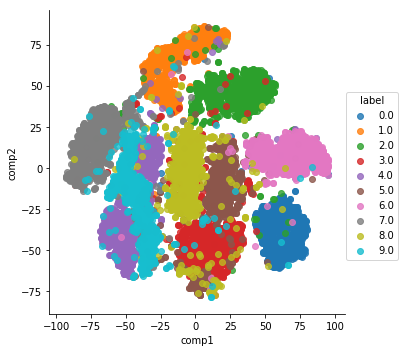

In [52]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [53]:
#same code as first t-sne, but with 500 iterations rather than 1000
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.068s...
[t-SNE] Computed neighbors for 10000 samples in 40.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.065068
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.703835
[t-SNE] Error after 500 iterations: 1.872726


In [54]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

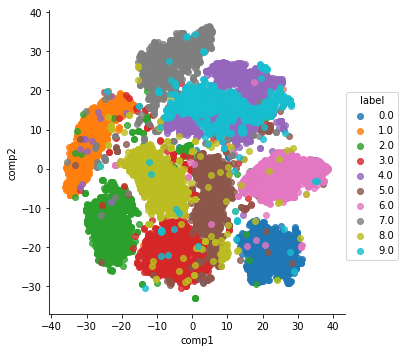

In [55]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [56]:
#same code as first t-sne, but with a learning rate of 100 rather than 200
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.062s...
[t-SNE] Computed neighbors for 10000 samples in 35.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.052039
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.965988
[t-SNE] Error after 1000 iterations: 1.729722


In [57]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

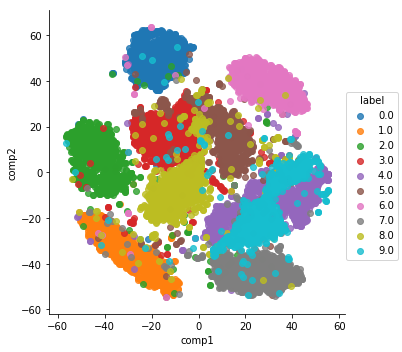

In [58]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## K-Means Clustering

Next, we use k-means clustering to cluster the data by its label. This is usually an unsupervised approach to clustering data, but we actually have the labels for all the data points, so we can test the accuracy of our results because of this.

The parameter "k" in our model will be 10, because k represents the number of clusters we want, and we want 10 because there are 10 different labels for the images. We don't need to scale the data, nor should we, because the data is image data where the pixels have defined distances from each other in order to create an image. Because we don't want to distort the distances between these points, we don't want to scale the data. In order to evaluate how well the model did at clustering, we use the silhouette score, where a score closest to 1 is the best.

In [71]:
#because of the sheer size of the data, we will select a subset for k-means clustering
from sklearn.utils import shuffle
X_sub = shuffle(X)[0:3000]

In [72]:
#Compress to two first components
pca_X_sub = PCA(n_components=2)
X_sub_kmeans = pca_X_sub.fit_transform(X_sub)

In [73]:
#crate dataframe to assist with silhouette score
k_means = pd.DataFrame({'comp1':X_sub_kmeans[:,0], 'comp2':X_sub_kmeans[:,1]})

In [74]:
#import packages for KMeans model and silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [79]:
#define kmeans model with k=10, 100 iterations
kmeans_model = KMeans(n_clusters=10, n_init=100, n_jobs=-1).fit(X_sub_kmeans)
#store labels from kmeans model 
labels = kmeans_model.labels_
#silhouette score
score = round(silhouette_score(k_means[['comp1', 'comp2']], labels, metric='euclidean'),3)
#print score
print(score)

0.359


In [80]:
# Create dataframe of results for t-SNE
kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

(-3, 3)

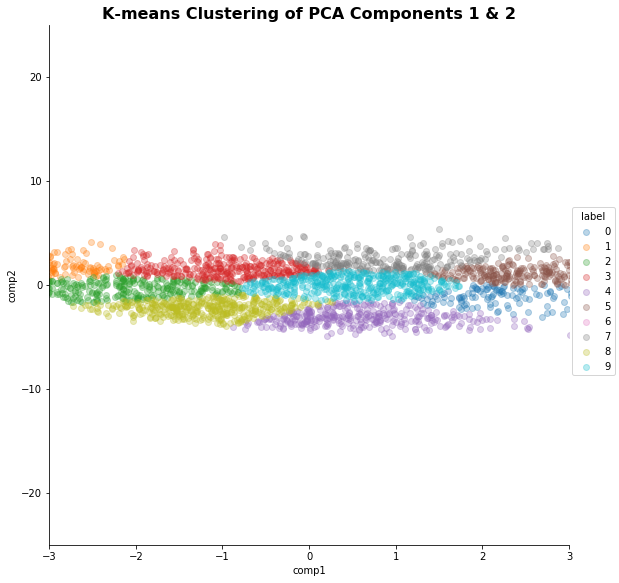

In [81]:
# Create the plot
lm = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
plt.title('K-means Clustering of PCA Components 1 & 2', fontsize=16, fontweight='bold')
axes = lm.axes
axes[0,0].set_ylim(-25,25)
axes[0,0].set_xlim(-3,3)

Let's try it with more iterations to test robustness. I won't change the number of clusters, though, because we need to have 10 to match the number of labels. 

(-3, 3)

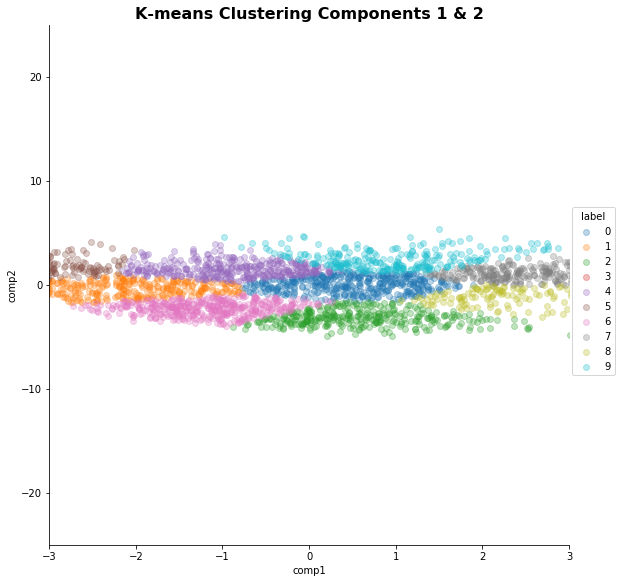

In [85]:
kmeans_model = KMeans(n_clusters=10, n_init=200, n_jobs=-1).fit(X_sub_kmeans)
labels = kmeans_model.labels_

kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

lm = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
plt.title('K-means Clustering Components 1 & 2', fontsize=16, fontweight='bold')
axes = lm.axes
axes[0,0].set_ylim(-25,25)
axes[0,0].set_xlim(-3,3)

(-3, 3)

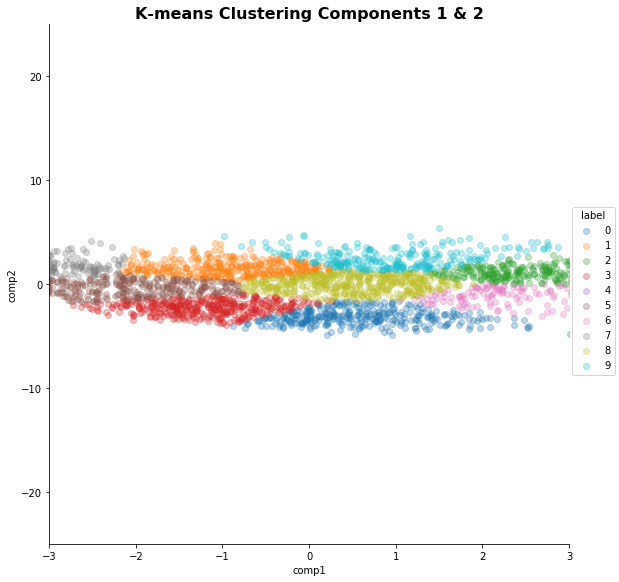

In [83]:
kmeans_model = KMeans(n_clusters=10, n_init=150, n_jobs=-1).fit(X_sub_kmeans)
labels = kmeans_model.labels_

kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

lm = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
plt.title('K-means Clustering Components 1 & 2', fontsize=16, fontweight='bold')
axes = lm.axes
axes[0,0].set_ylim(-25,25)
axes[0,0].set_xlim(-3,3)

It looks like it pretty much stays the same between different numbers of iterations.

Just to test, let's see what the t-sne looks like with the data scaled before doing the k-means clustering and see if it makes a difference. Perhaps the distance between points is important because a single data point represents the whole image when all the dimensions are condensed. If this is the case, images with the same label should be close in space to one another in that high-dimensional space, but will need to be scaled for the clustering to group images of the same number/label together.

In [86]:
#import this package to scale data
from sklearn import preprocessing

In [87]:
#scale the data
X_scaled = preprocessing.scale(X)

In [88]:
#The following is just a repeat of the steps above, but with the scaled data
X_sub = shuffle(X_scaled)[0:3000]

In [89]:
pca_X_sub = PCA(n_components=2)
X_sub_kmeans = pca_X_sub.fit_transform(X_sub)

In [90]:
k_means = pd.DataFrame({'comp1':X_sub_kmeans[:,0], 'comp2':X_sub_kmeans[:,1]})

In [91]:
kmeans_model = KMeans(n_clusters=10, n_init=100, n_jobs=-1).fit(X_sub_kmeans)
labels = kmeans_model.labels_
score = round(silhouette_score(k_means[['comp1', 'comp2']], labels, metric='euclidean'),3)
print(score)

0.356


In [92]:
kmeans_tsne = pd.DataFrame(X_sub_kmeans, columns=['comp1', 'comp2'])
kmeans_tsne['label'] = labels

(-25, 25)

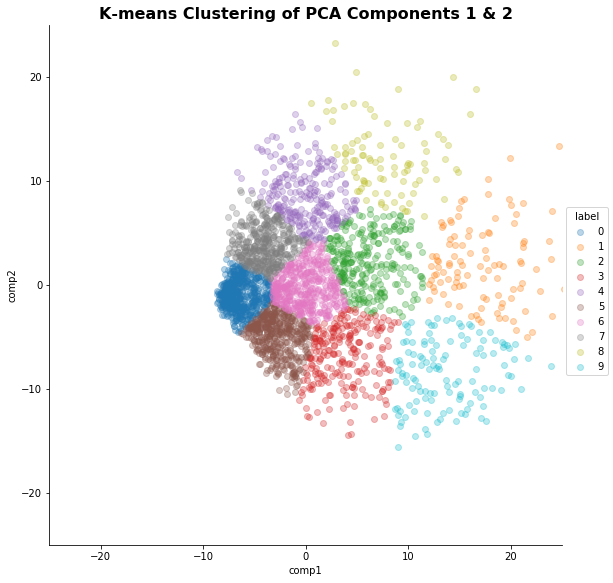

In [95]:
lm = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
plt.title('K-means Clustering of PCA Components 1 & 2', fontsize=16, fontweight='bold')
axes = lm.axes
axes[0,0].set_ylim(-25,25)
axes[0,0].set_xlim(-25,25)

It looks like scaling the data gave similar results (it's clustered fairly well by label), although there are some components that are really spread out on the right side of the plot. The x-axis is also wider here to be able to see all the data. If the x-axis was the same width as the previous plots, we would not be able to see all the data. 

## Hierarchal Clustering

Hierarchal Clustering is another method for clustering data, however, we don't need to know a k value beforehand. After plotting the dendrogram, we can then look to see how many clusters are reasonable for the data. Let's work through this and look at the dendrogram to explain further. I will use a random subset of 500 data points, since the dendrogram shows every data point at the bottom, and we don't want it to get too messy. 

In [96]:
#import the dendrogram package
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0.5,1,'Dendrogram')

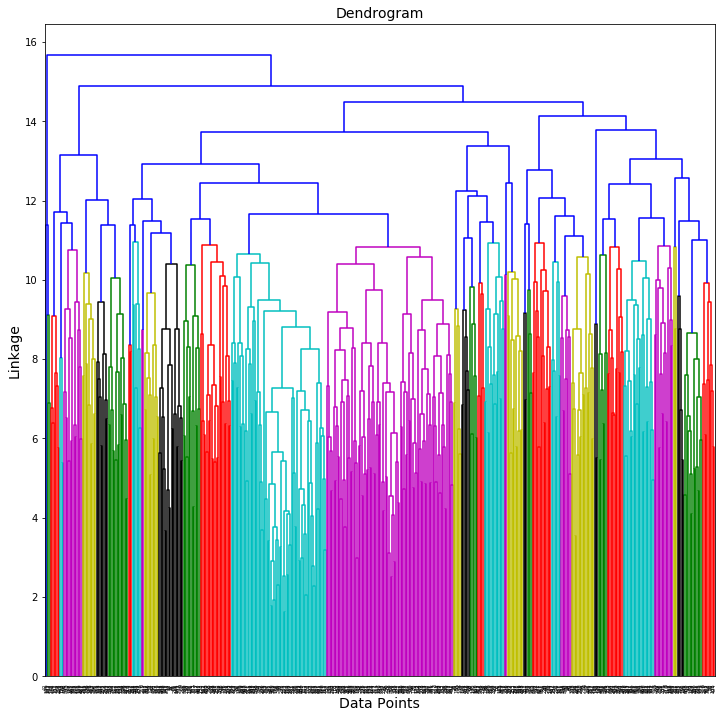

In [98]:
#shuffle the data and choose a sample of 500 data points, using the complete linkage method
X_shuff = shuffle(X)
Z = linkage(X_shuff[0:500], 'complete')

#plot the dendrogram and label
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.ylabel('Linkage', fontsize = 14)
plt.xlabel('Data Points', fontsize = 14)
plt.title('Dendrogram', fontsize = 14)

Text(0.5,1,'Dendrogram')

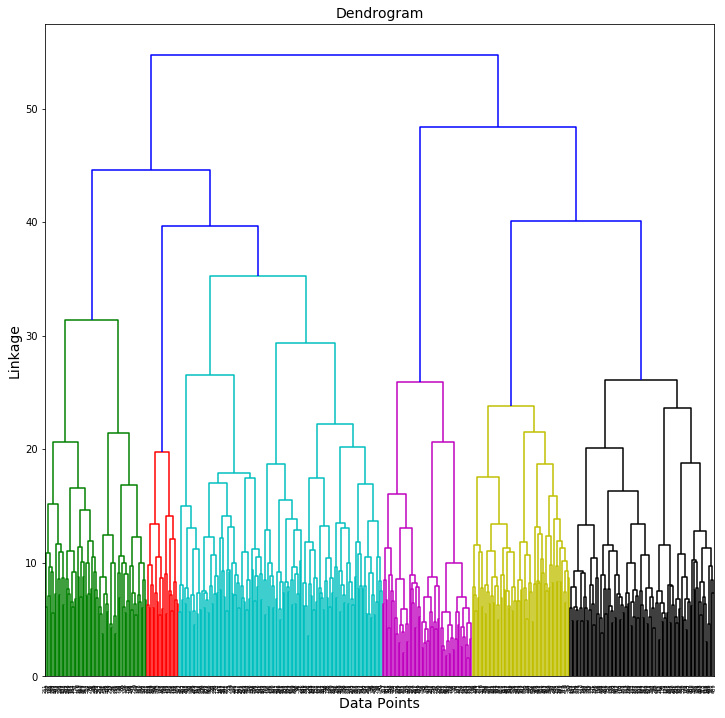

In [99]:
#same as above, but with ward linkage method
Z = linkage(X_shuff[0:500], 'ward')

plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.ylabel('Linkage', fontsize = 14)
plt.xlabel('Data Points', fontsize = 14)
plt.title('Dendrogram', fontsize = 14)

Text(0.5,1,'Dendrogram')

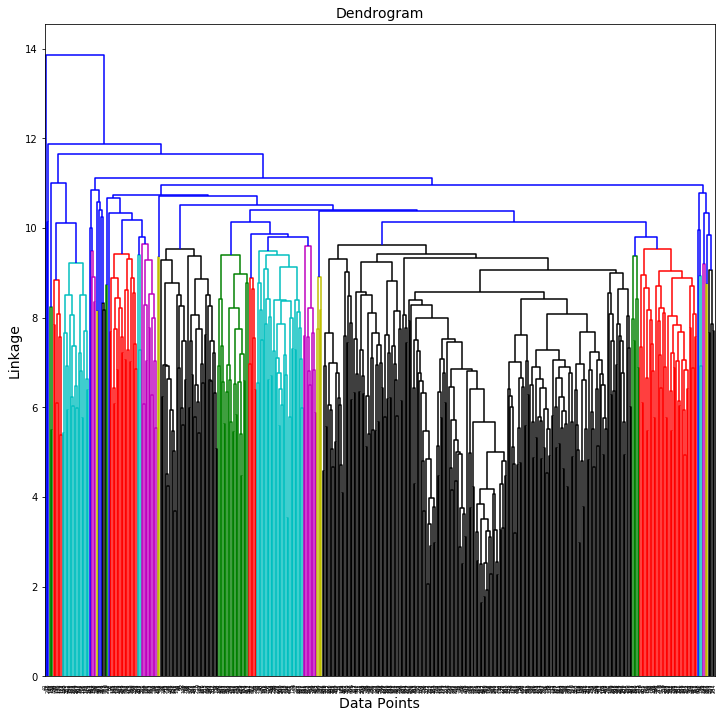

In [100]:
#same as above, but with average linkage method
Z = linkage(X_shuff[0:500], 'average')

plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.ylabel('Linkage', fontsize = 14)
plt.xlabel('Data Points', fontsize = 14)
plt.title('Dendrogram', fontsize = 14)

In the above 3 dendrograms, I use different linkage methods to see what worked best. The three I used were 'complete,' 'ward,' and 'average.' 'Complete' uses the maximum distance between points in clusters, 'Ward' merges the two clusters which minimize the total within-cluster variance after merging, and 'Average' uses the average distance between points in clusters. It appears that the 'ward' linkage method was the cleanest, separating out the labels very early. I would use 6 clusters for this clustering method, because if you draw a horizontal line from about y=37, it goes through 6 lines/branches, which are the main 6 that divide the data out into 6 labels. The 'complete' linkage method was messier, clustering data with different labels together frequently, although in good size chunks. For this method, I would choose about 9 clusters because I don't want to go too far down and overfit the data, or go up too high and make really poor clusters. The line to draw to get 9 clusters is at about y=13. This doesn't do as good of a job as the 'ward' linkage method, though. The 'average' method was messy as well but was able to cluster some big groups of data with the same label. This method as well as the 'complete' method seemed to cluster things later than the 'ward' method. It's not as efficient, sometimes breaking off branches that include a handful of data points, making it difficult to determine a good cluster size to choose. I would draw a line at about the y=11 mark, resulting in about 9 clusters, but it's hard to tell exactly because of the closeness and number of the branch lines. 




And that concludes the assignment, where we analyzed this image data with PCA, t-SNE, k-Means Clustering, and Hierarchal Clustering.